In [1]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris.data[['petal length (cm)','petal width (cm)']].values
y=(iris.target == 2)

In [4]:
len(X),len(y)

(150, 150)

In [5]:
svm_pipeline = make_pipeline(StandardScaler(),LinearSVC(C=1,dual=True,random_state=42))
svm_pipeline.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [6]:
x_new= [[5.5,1.7],[5.0,1.5]]
svm_pipeline.predict(x_new)

array([ True, False])

In [7]:
svm_pipeline.decision_function(x_new)

array([ 0.66163411, -0.22036063])

## Non Linear SVM Classification

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(loss='hinge',C=10))
])

In [10]:
polynomial_svm_clf.fit(X,y)

C:\Users\Diacto\miniconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [11]:
polynomial_svm_clf.predict(x_new)

array([ True, False])

In [12]:
from sklearn.svm import SVC
X,y= make_moons(n_samples=100,noise=0.15,random_state=42)
poynomial_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5))

In [13]:
poynomial_svm.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [14]:
import matplotlib.pyplot as plt

In [25]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

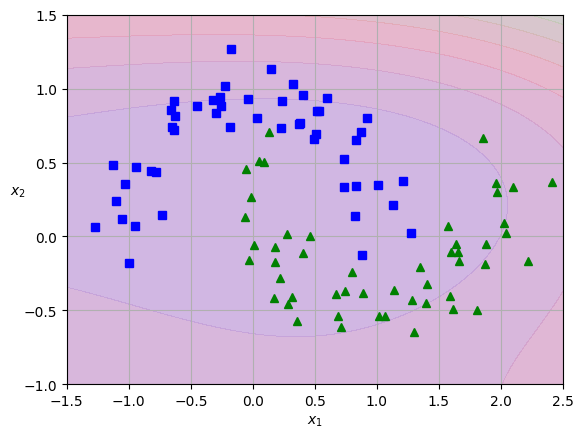

In [26]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

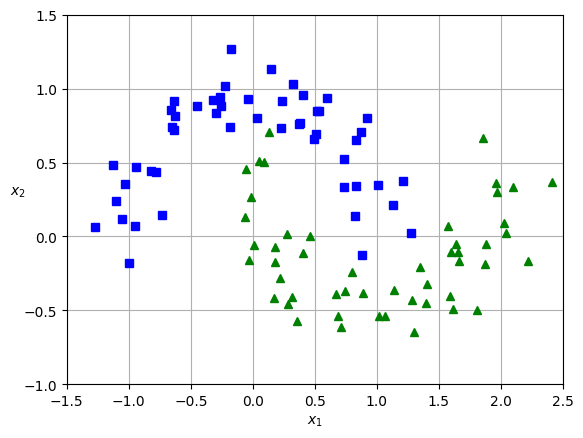

In [27]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Adding Similarity Features

### Gaussian RBF Kernel

In [28]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf',gamma=5,C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

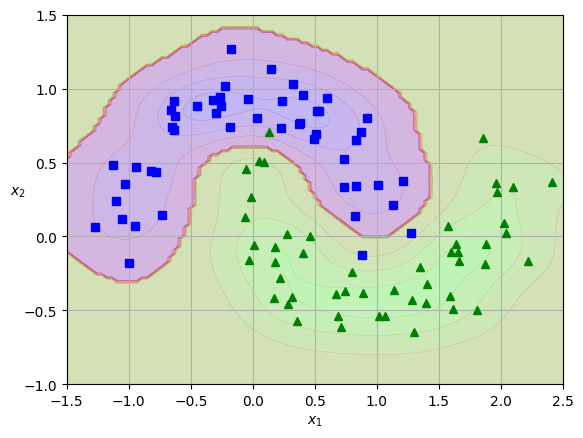

In [29]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

## Linear Regression

In [31]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5,dual=True)
svm_reg.fit(X,y)

LinearSVR(dual=True, epsilon=1.5)

### Nonlinear Regression

In [32]:
from sklearn.svm import SVR
svm_poloy_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poloy_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')